In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install geopandas
import geopandas as gpd
from statsmodels.stats.outliers_influence import variance_inflation_factor
#!pip install folium matplotlib mapclassify

In [3]:
df = pd.read_csv('./data/df_cleaning_01.csv')
pd.set_option('display.max_columns', len(df.columns)) 
df.drop(columns = 'Unnamed: 0', inplace = True)
df_train = pd.read_csv('./data/imputed_train.csv')
df_time = pd.read_csv('./data/time_series_plot.csv')

In [4]:
df.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,tv,heating,gym,internet,parking,kitchen_supply,bathroom_supply,laundry,entrance,stay,secure
0,2539,1.00,0.90,0.0,9.0,1,1,Kensington,40.64529,-73.97238,Private room in rental unit,Private room,2,1 shared bath,1.0,1.0,299.0,30,730,1,21,356,9,0,0,4.89,4.88,5.00,5.00,5.0,4.75,4.88,0,0.11,1,1,0,1,1,1,1,1,0,1,1
1,2595,0.75,0.23,0.0,6.0,1,1,Midtown,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,175.0,30,1125,1,0,280,49,1,0,4.68,4.73,4.63,4.77,4.8,4.81,4.40,0,0.31,1,1,0,1,1,1,1,1,0,1,1
2,45910,1.00,0.19,0.0,7.0,1,1,Ridgewood,40.70309,-73.89963,Entire rental unit,Entire home/apt,16,2.5 baths,5.0,10.0,425.0,30,730,1,30,365,13,0,0,4.42,4.64,4.36,4.82,5.0,4.82,4.55,0,0.10,1,1,0,1,1,1,1,1,0,1,0
3,5136,NaN,0.33,0.0,1.0,1,1,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.5 baths,2.0,2.0,275.0,21,1125,1,0,179,3,1,1,5.00,5.00,5.00,5.00,5.0,4.67,5.00,0,0.03,1,1,0,1,0,1,1,1,0,1,0
4,45935,NaN,NaN,0.0,1.0,1,0,Mott Haven,40.80635,-73.92201,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,60.0,30,40,1,23,83,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,0,1,0,1,0,0,0,1,0


### Data Cleaning/EDA

I first began by doing a .describe to see if there were any outliers in each of the columns. From what it seemed like, price had some outliers and will be looked at more thorougly. 

In [5]:
df.describe()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,tv,heating,gym,internet,parking,kitchen_supply,bathroom_supply,laundry,entrance,stay,secure
count,3.974700e+04,26285.000000,27970.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,35997.000000,38907.000000,39747.000000,39747.000000,3.974700e+04,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,31462.000000,31003.000000,31013.000000,30999.000000,31008.000000,30996.000000,30996.000000,39747.000000,31462.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000,39747.000000
mean,1.165726e+17,0.936897,0.823666,0.205449,68.273882,0.987597,0.844466,40.728836,-73.945573,2.935769,1.363086,1.642147,197.278821,19.004780,5.562844e+04,0.842403,5.581654,131.611166,26.742572,7.770096,0.747453,4.628903,4.751849,4.632725,4.815745,4.810389,4.742132,4.651998,0.279644,1.245547,0.759856,0.761517,0.099781,0.932724,0.475357,0.943895,0.788135,0.751956,0.258812,0.903137,0.419730
std,2.467999e+17,0.163196,0.265502,0.404035,444.076674,0.110679,0.362417,0.058681,0.057912,1.996859,0.731183,1.119437,353.170438,30.770378,1.077246e+07,0.364367,8.726990,138.516130,56.314103,18.805081,1.920401,0.733179,0.463998,0.542170,0.414390,0.439006,0.408734,0.488804,0.448830,1.992571,0.427176,0.426162,0.299712,0.250502,0.499399,0.230127,0.408635,0.431883,0.437988,0.295774,0.493521
min,2.539000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.500314,-74.269520,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.633334e+07,0.960000,0.770000,0.000000,1.000000,1.000000,1.000000,40.687690,-73.983250,2.000000,1.000000,1.000000,80.000000,2.000000,5.000000e+01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.590000,4.710000,4.500000,4.800000,4.800000,4.660000,4.560000,0.000000,0.140000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,3.819428e+07,1.000000,0.950000,0.000000,2.000000,1.000000,1.000000,40.724545,-73.953640,2.000000,1.000000,1.000000,130.000000,14.000000,3.650000e+02,1.000000,0.000000,76.000000,5.000000,1.000000,0.000000,4.830000,4.900000,4.800000,4.950000,4.960000,4.860000,4.780000,0.000000,0.570000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,5.258142e+07,1.000000,1.000000,0.000000,4.000000,1.000000,1.000000,40.763240,-73.925470,4.000000,2.000000,2.000000,219.000000,30.000000,1.125000e+03,1.000000,8.000000,277.000000,25.000000,7.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.980000,1.000000,1.790000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.098549e+17,1.000000,1.000000,1.000000,4022.000000,1.000000,1.000000,40.928810,-73.690060,16.000000,13.000000,24.000000,16500.000000,1250.000000,2.147484e+09,1.000000,30.000000,365.000000,1480.000000,949.000000,122.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,123.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Host Response Rate

When looking at the host response rate, a histogram was made and it can be seen that it is left skewed by a large margin. But as it can be seen, a large number of host have a 100% response rate

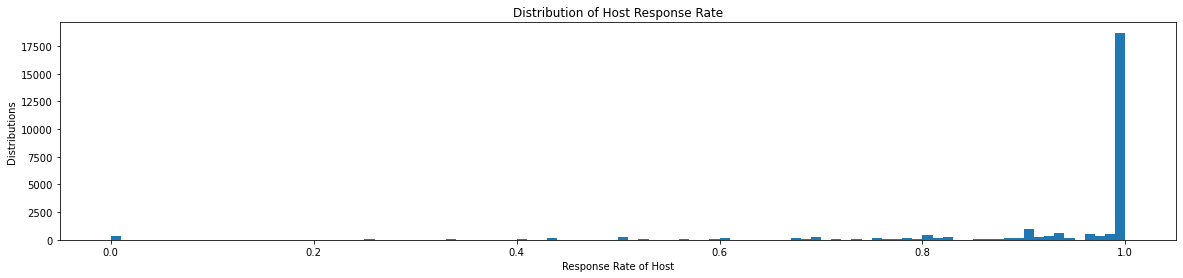

In [6]:
plt.figure(figsize = (20,4))
plt.hist(df['host_response_rate'], bins = 100)
plt.title('Distribution of Host Response Rate')
plt.xlabel('Response Rate of Host')
plt.ylabel('Distributions');

I wanted to look at the value counts for each category, so I made bins for each of the response rates. As seen from the bar graph, the spread out ofeach bin. 

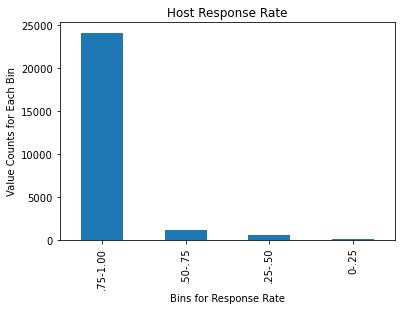

In [7]:
df['response_rate_bins'] = pd.cut(df['host_response_rate'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['response_rate_bins'].value_counts().plot(kind = 'bar')
plt.title('Host Response Rate')
plt.xlabel('Bins for Response Rate')
plt.ylabel('Value Counts for Each Bin');

The scatter plot was made to see the correlation between host response rate and the price, the data seems to be too spread out to see a clear indication of correlation being present. 

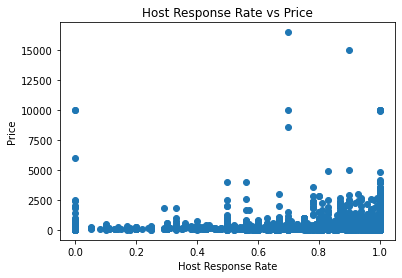

In [8]:
plt.scatter(df['host_response_rate'], df['price'])
plt.title('Host Response Rate vs Price')
plt.xlabel('Host Response Rate')
plt.ylabel('Price');

### Host Acceptance rate

When looking at the distrubtion of host acceptance rate, large distriubtions were found at 100% and some around 0% as well. The graph was left skewed. 

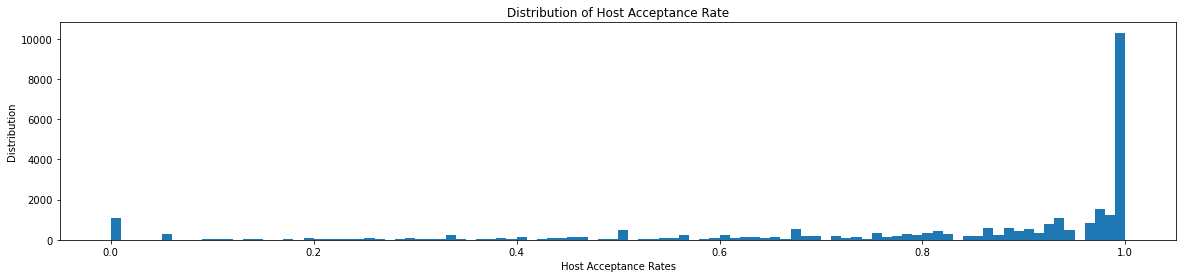

In [9]:
plt.figure(figsize = (20,4))
plt.hist(df['host_acceptance_rate'], bins = 100)
plt.title('Distribution of Host Acceptance Rate')
plt.xlabel('Host Acceptance Rates')
plt.ylabel('Distribution');

I wanted to look at the value counts for acceptance rate, so I began by putting them into bins to be able to visualize them in a bar graph. After making the graph it can be seen that 100-75% was the highest, so host are accepting a large number of requests. 

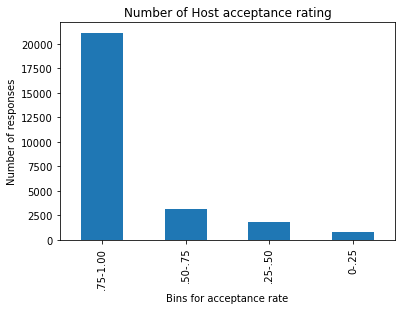

In [10]:
df['rate_accept_bins'] = pd.cut(df['host_acceptance_rate'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['rate_accept_bins'].value_counts().plot(kind = 'bar')
plt.title('Number of Host acceptance rating')
plt.xlabel('Bins for acceptance rate')
plt.ylabel('Number of responses');

### Host_is_superhost

The host is superhost was made into 0 and 1 and as the graph can se been, there are more hosts that haven't become superhost yet. 

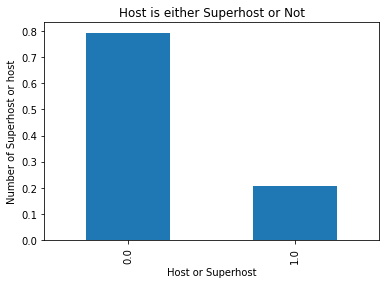

In [11]:
df['host_is_superhost'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Host is either Superhost or Not')
plt.xlabel('Host or Superhost')
plt.ylabel('Number of Superhost or host');

Due to the large quantity of no superhost, it can be seen that hthe price is higher for no superhost compared to superhost. 

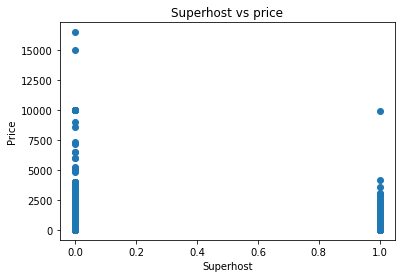

In [12]:
plt.scatter(df['host_is_superhost'], df['price'])
plt.title('Superhost vs price')
plt.xlabel('Superhost')
plt.ylabel('Price');

### Host_has_profile_pic

Large number of individuals are verified when it comes to Airbnb which shows a trustworthy aspect if the individual is known. There is a small count of individuals that are not known. 

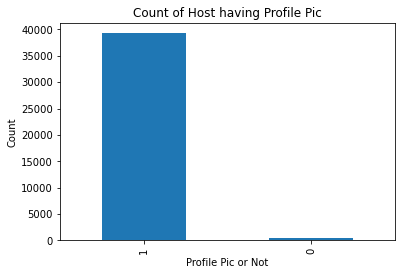

In [13]:
df['host_has_profile_pic'].value_counts().plot(kind = 'bar')
plt.title('Count of Host having Profile Pic')
plt.xlabel('Profile Pic or Not')
plt.ylabel('Count');           

When it comes to price vs host having a profile pic, there seems to be an outlier for both where its over 15000. 

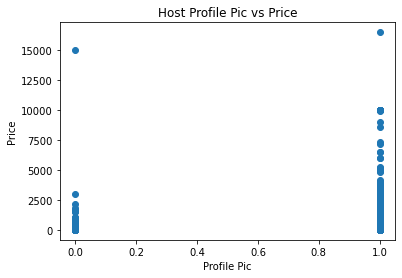

In [14]:
plt.scatter(df['host_has_profile_pic'], df['price'])
plt.title('Host Profile Pic vs Price')
plt.xlabel('Profile Pic')
plt.ylabel('Price');

### Host_identity_verified

A large number of individuals who have AirBnB are verfified compared to a small numbers that aren't.

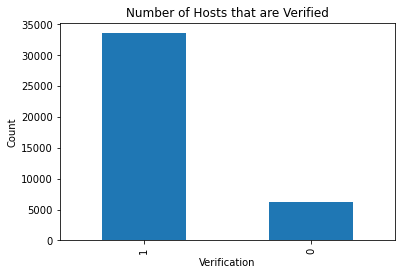

In [15]:
df['host_identity_verified'].value_counts().plot(kind = 'bar')
plt.title('Number of Hosts that are Verified')
plt.xlabel('Verification')
plt.ylabel('Count');

### Neighborhood

I made a graph that shows each of the latitude and longitude points and it shows a glimpse of New YorK City in it. 

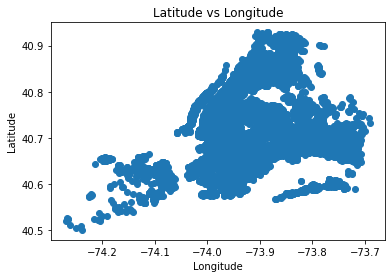

In [16]:
plt.scatter(df['longitude'], df['latitude'])
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude');

By using geopandas, and a new json file that was provided, I was able to look at the different neighborhood groups and how they are separated out throughout New York City. 

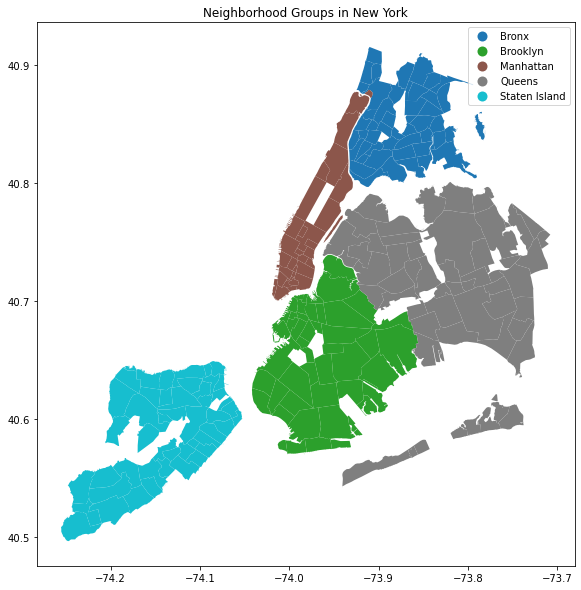

In [17]:
geo_map = gpd.read_file('./data/neighbourhoods-2.geojson', driver="GeoJSON")
gpd.GeoDataFrame(geo_map).plot('neighbourhood_group', legend = True, figsize = (10,10))
plt.title('Neighborhood Groups in New York');

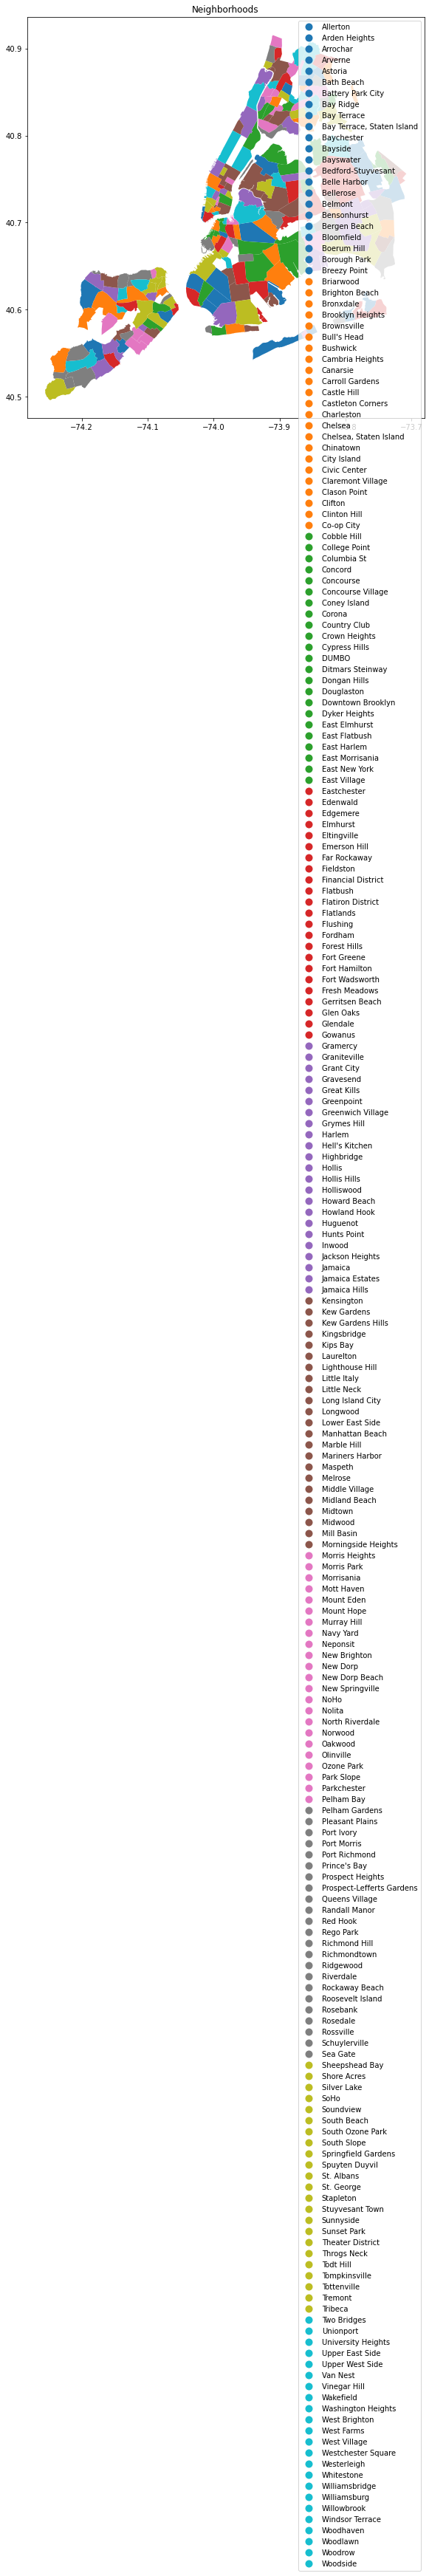

In [18]:
gpd.GeoDataFrame(geo_map).plot('neighbourhood', legend = True, figsize = (10,10))
plt.title('Neighborhoods');

In [19]:
gpd.GeoDataFrame(geo_map).explore('neighbourhood_group', legend = True)

In [20]:
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)

In [21]:
# Dropping the empty column
geo_map.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['mean_price'] = df.groupby('borough').price.mean().values

# Joining the dataframes
borough_map_df = geo_map.set_index('neighbourhood').join(borough_df)

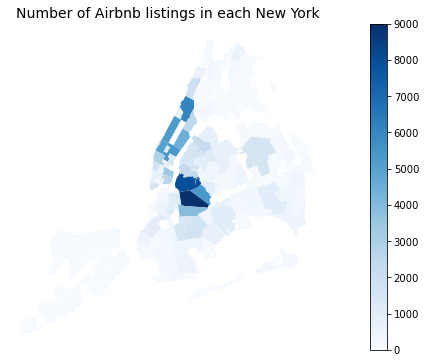

In [22]:
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each New York', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

### Property Type

Looked at the value counts of the different property types. As presented from the graph, it can be seen that Entire rental Units are the most common and then private room in rental Units are the next largest in number. 

Entire rental unit             22587
Private room in rental unit    15317
Room rental unit                1215
Shared room in rental unit       552
Other                             76
Name: property_type, dtype: int64


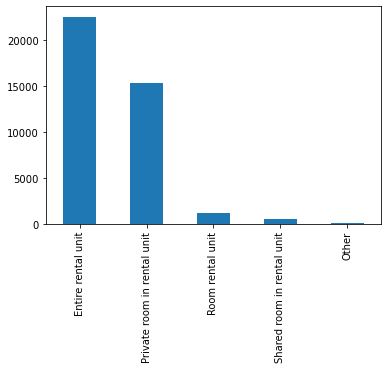

In [23]:
df['property_type'].value_counts().plot(kind = 'bar')
print(df['property_type'].value_counts())

As it can be seen the Room rental unit Property type was found to have more expensive prices compared to the other groups. 

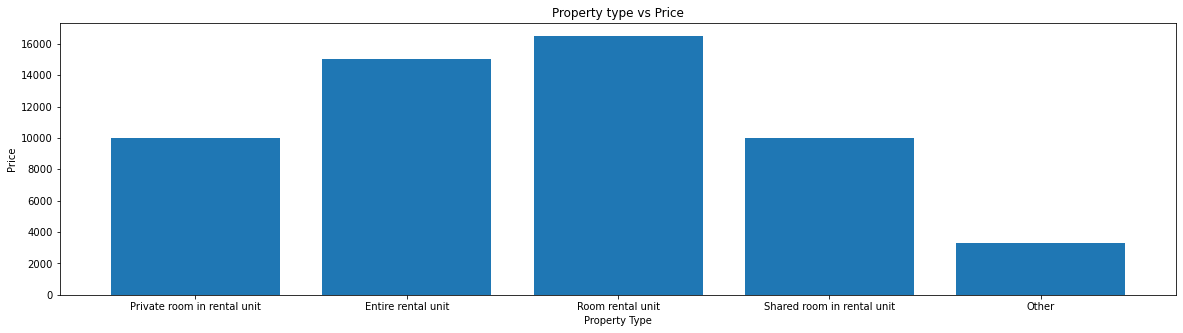

In [24]:
plt.figure(figsize = (20,5))
plt.bar(df['property_type'], df['price'])
plt.title('Property type vs Price')
plt.xlabel('Property Type')
plt.ylabel('Price');

### Room Type

Room type was graphed and as it can be seen, entire home and apartments had the largest number of listings and then private rooms right after. 

Entire home/apt    22724
Private room       16301
Shared room          552
Hotel room           170
Name: room_type, dtype: int64


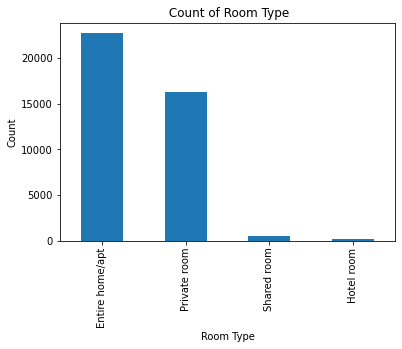

In [25]:
print(df['room_type'].value_counts())
df['room_type'].value_counts().plot(kind = 'bar')
plt.title(' Count of Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count');

Price was compared to the room type and found to be seen that Private room and Entire home/apt had the highest price compared to hotel room and shared room. 

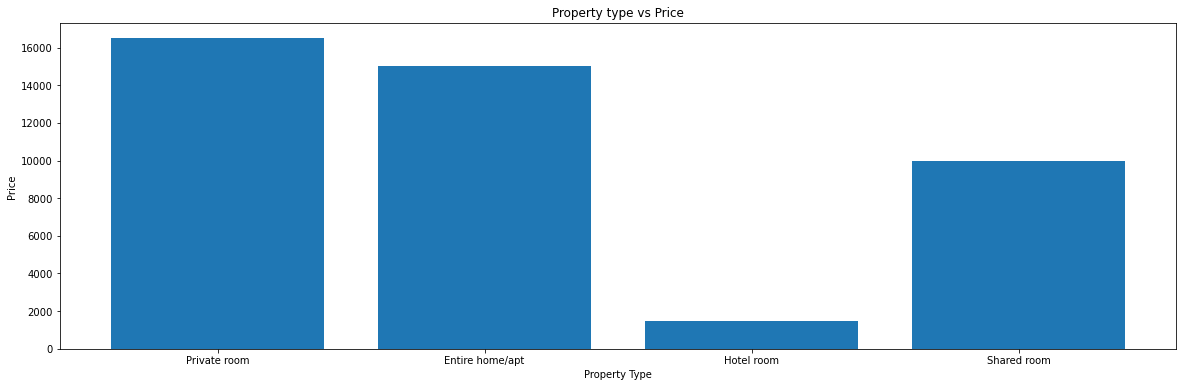

In [26]:
plt.figure(figsize = (20,6))
plt.bar(df['room_type'], df['price'])
plt.title('Property type vs Price')
plt.xlabel('Property Type')
plt.ylabel('Price');

### Accommodations

It seems that airbnb that can accomodate up to 14 people had the highest mean price and coming right after that was 16. 

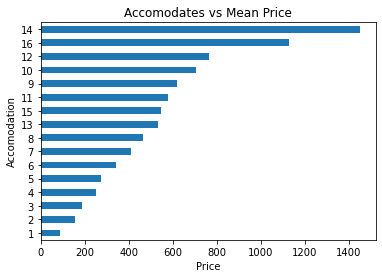

In [27]:
df.groupby('accommodates').price.mean().sort_values(ascending = True).plot(kind='barh')
plt.title('Accomodates vs Mean Price')
plt.xlabel('Price')
plt.ylabel('Accomodation');

### Bathrooms

A histogram was made for the number of bathrooms and as it can be seen 1shared bath and 1 bath had the highest number and coming right after was 2.5 baths. 

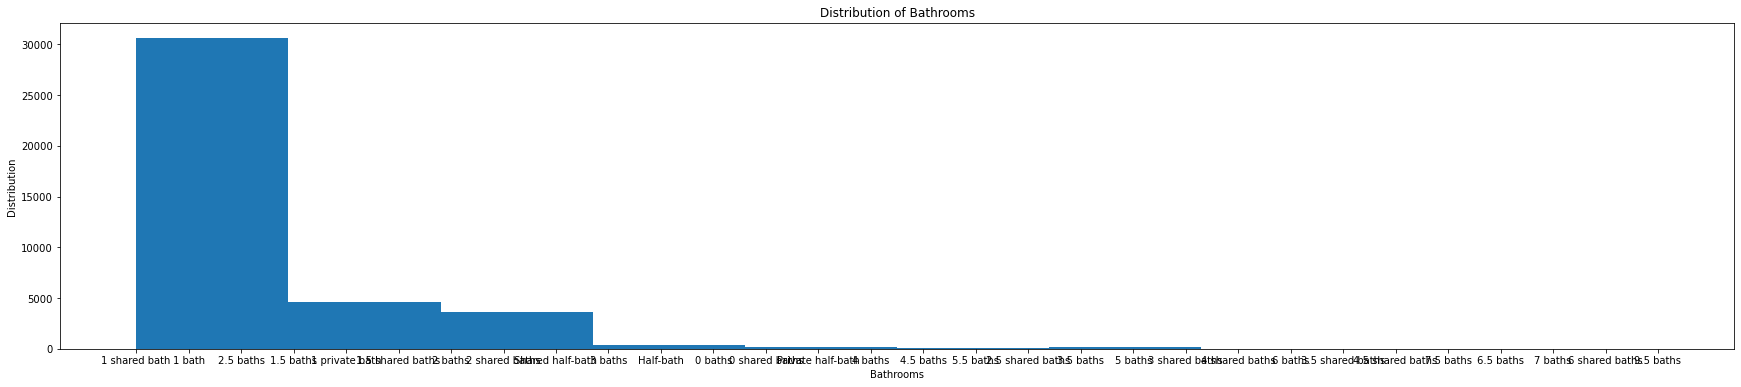

In [28]:
plt.figure(figsize = (30,6))
plt.hist(df['bathrooms'])
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Distribution');

Compared the price to the number of bathrooms and it seems that 5.5 shared bathrooms had the highest price. 

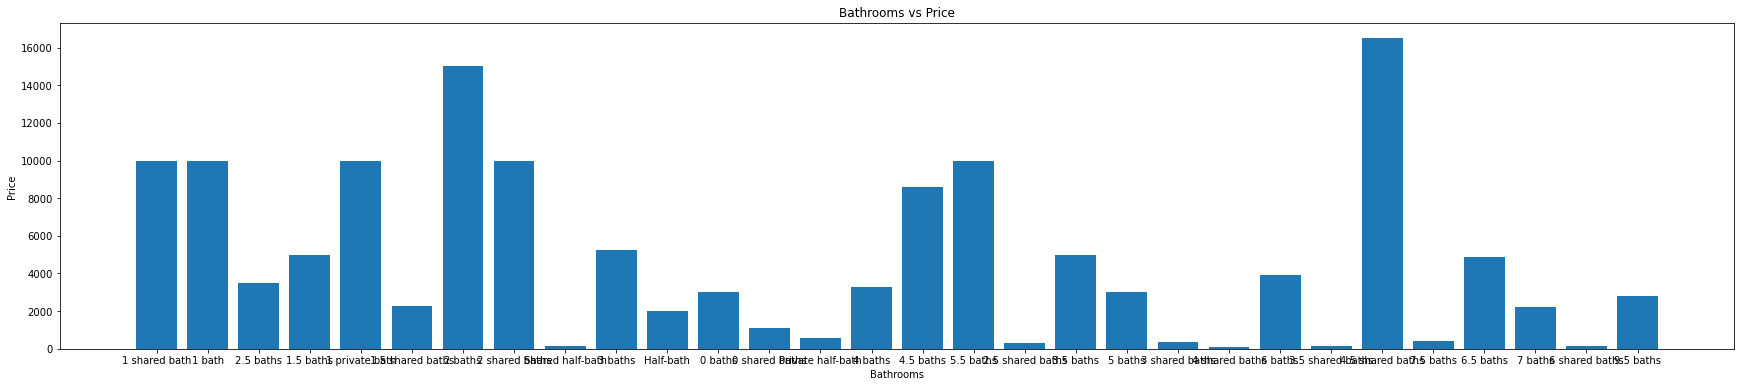

In [29]:
plt.figure(figsize = (30, 6))
plt.bar(df['bathrooms'], df['price'])
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price');

### Beds

In [30]:
max(df['beds']), min(df['beds'])

(24.0, 1.0)

I made a histogram to see the distribution of bedrooms and it can be seen most airbnb have 1-5 beds. When lookingat the max number of beds, there were an airbnb with 24 beds. 

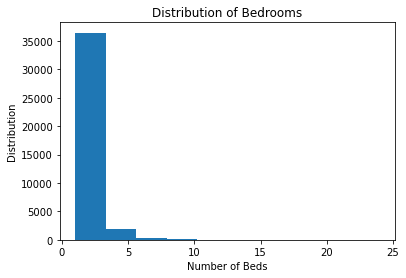

In [31]:
plt.hist(df['beds'])
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Beds')
plt.ylabel('Distribution');

The graph presented below shows no correlation between beds and price and as it can be seen more beds showed less in price compared to less beds. 

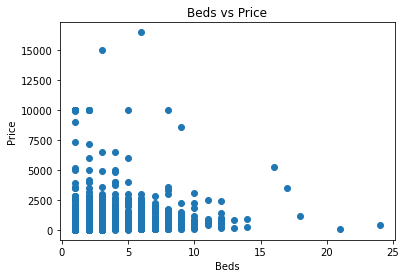

In [32]:
plt.scatter(df['beds'], df['price'])
plt.title('Beds vs Price')
plt.xlabel('Beds')
plt.ylabel('Price');

### Minimum Nights

The histogram shows the distribution of minimum nights and it sees to be between 0-200 days, with some outliers that are past 800. 

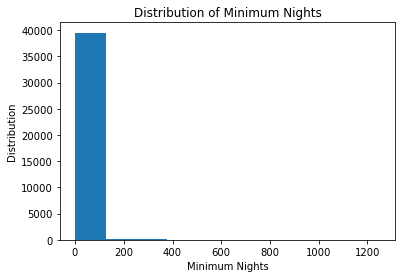

In [33]:
plt.hist(df['minimum_nights'])
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Distribution');

The boxplot shows the outliers that are past 800 for minimum nights. After further look some of the numbers dont represent realistic information and any number that lives longer than a year will beconsidered an outlier. 

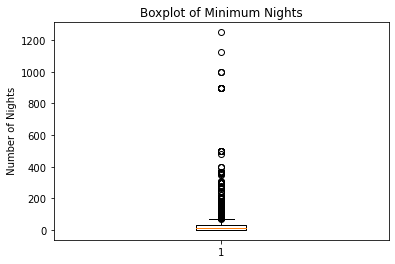

In [34]:
plt.boxplot(df['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.ylabel(' Number of Nights');

The scatter shows no correlation between the price and minimum nights and the values are pretty spread out. 

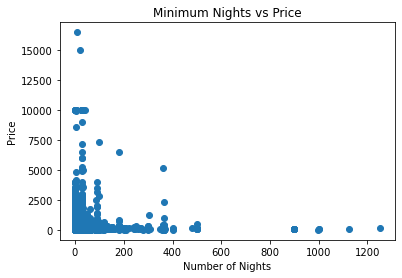

In [36]:
plt.scatter(df['minimum_nights'], df['price'])
plt.title('Minimum Nights vs Price')
plt.xlabel('Number of Nights')
plt.ylabel('Price');

### Price

From the boxplot it can be seen that there are some values that are distributed and far out which can cause the data to be skewed as a result, they will be dropped as well.

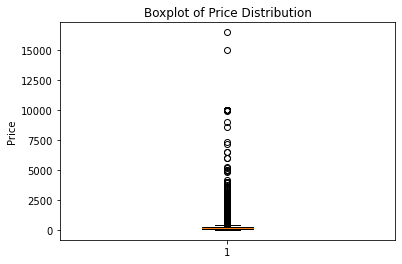

In [37]:
plt.boxplot(df['price'])
plt.title('Boxplot of Price Distribution')
plt.ylabel('Price');

### Availability

As from the graph presented below the avilability of the airbnb is way higher than them being preoccupied. 

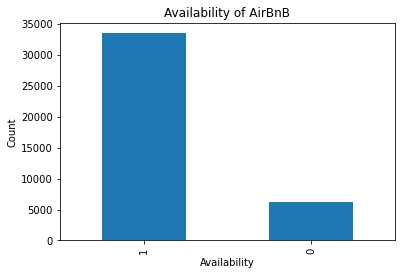

In [38]:
df['has_availability'].value_counts().plot(kind = 'bar')
plt.title('Availability of AirBnB')
plt.xlabel('Availability')
plt.ylabel('Count');

From the scatter plot there is not a strong correlation present when it comes to the prices but for some high prices. 

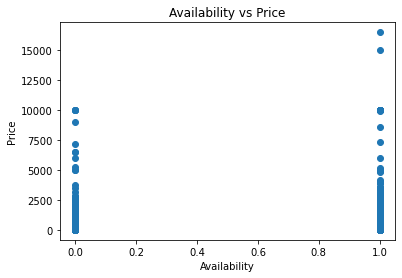

In [41]:
plt.scatter(df['has_availability'], df['price'])
plt.title('Availability vs Price')
plt.xlabel('Availability')
plt.ylabel('Price');

The 30 day availability was looked with price and it can be seen that there is no correlation so nothing can be seen from the data

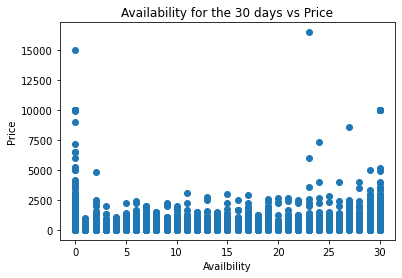

In [43]:
plt.scatter(df['availability_30'], df['price'])
plt.title('Availability for the 30 days vs Price')
plt.xlabel('Availbility')
plt.ylabel('Price');

The 365 availability seems to show a similar correlation as the 30 day availability when it comes to price as it can be seen no strong correlation between them. 

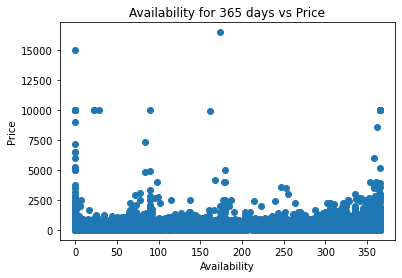

In [45]:
plt.scatter(df['availability_365'], df['price'])
plt.title('Availability for 365 days vs Price')
plt.xlabel('Availability')
plt.ylabel('Price');

### Reviews

A Histogram was made to look at the number of reviews and from it, it is left skewed with most of the data between 0-400. 

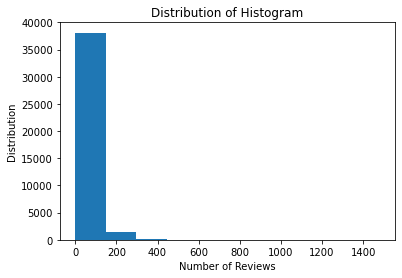

In [46]:
plt.hist(df['number_of_reviews'])
plt.title('Distribution of Histogram')
plt.xlabel('Number of Reviews')
plt.ylabel('Distribution');

There isn't a strong correlation between the number of reviews and the price as can be seen the data is pretty spread, but most is near the 0-200 area. 

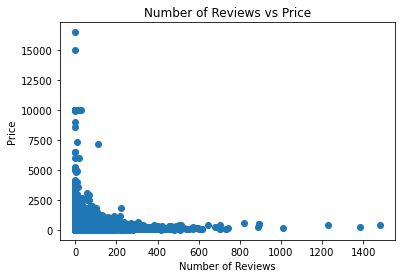

In [48]:
plt.scatter(df['number_of_reviews'], df['price'])
plt.title('Number of Reviews vs Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price');

### Review Scores

For the data with review scores, I first began making bins of them to simplify the data and look at each separate bins.From the different bar graphs presented below, it can be seen that most of the scores are between 75%-100% which presents high number of respect for the airbnb and how the host is taking care of them. 

In [50]:
df['review_rating_bins'] = pd.cut(df['review_scores_rating'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['review_accuracy_bins'] = pd.cut(df['review_scores_accuracy'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['review_checkin_bins'] = pd.cut(df['review_scores_checkin'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['review_clean_bins'] = pd.cut(df['review_scores_cleanliness'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['review_comm_bins'] = pd.cut(df['review_scores_communication'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['review_location_bins'] = pd.cut(df['review_scores_location'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])
df['review_values_bins'] = pd.cut(df['review_scores_value'], bins=[0,0.25,0.50, 0.75, 1] , labels = ['0-.25', '.25-.50', '.50-.75', '.75-1.00'])

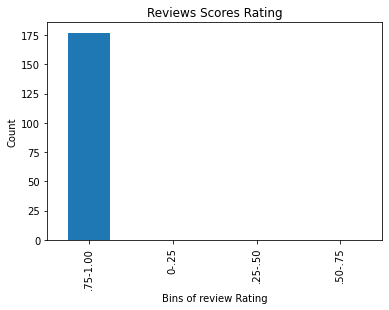

In [51]:
df['review_rating_bins'].value_counts().plot(kind = 'bar')
plt.title('Reviews Scores Rating')
plt.xlabel('Bins of review Rating')
plt.ylabel('Count');

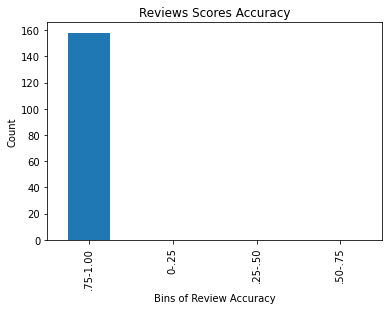

In [53]:
df['review_accuracy_bins'].value_counts().plot(kind = 'bar')
plt.title('Reviews Scores Accuracy')
plt.xlabel('Bins of Review Accuracy')
plt.ylabel('Count');

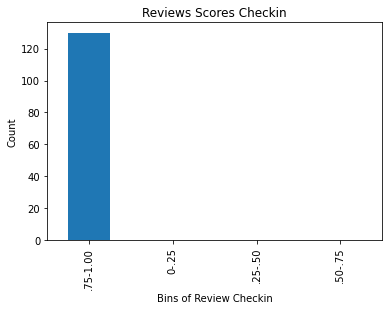

In [55]:
df['review_checkin_bins'].value_counts().plot(kind = 'bar')
plt.title('Reviews Scores Checkin')
plt.xlabel('Bins of Review Checkin')
plt.ylabel('Count');

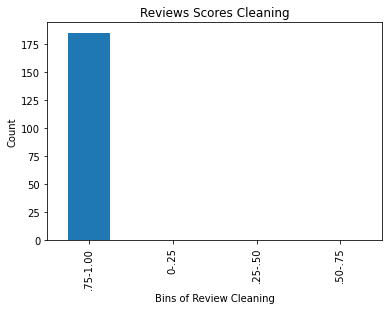

In [56]:
df['review_clean_bins'].value_counts().plot(kind = 'bar')
plt.title('Reviews Scores Cleaning')
plt.xlabel('Bins of Review Cleaning')
plt.ylabel('Count');

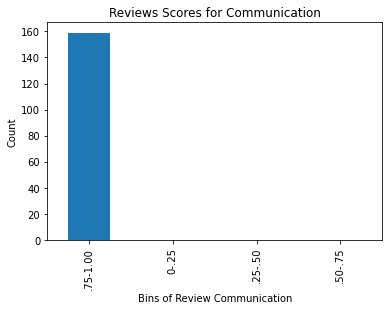

In [57]:
df['review_comm_bins'].value_counts().plot(kind = 'bar')
plt.title('Reviews Scores for Communication')
plt.xlabel('Bins of Review Communication')
plt.ylabel('Count');

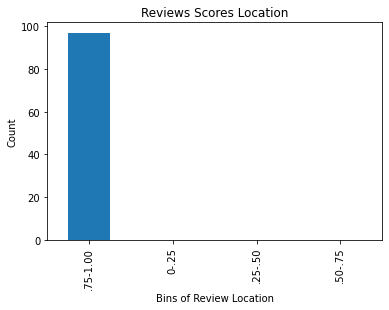

In [58]:
df['review_location_bins'].value_counts().plot(kind = 'bar')
plt.title('Reviews Scores Location')
plt.xlabel('Bins of Review Location')
plt.ylabel('Count');

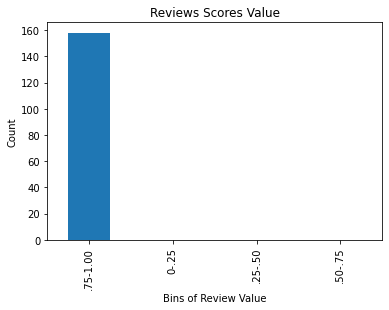

In [59]:
df['review_values_bins'].value_counts().plot(kind = 'bar')
plt.title('Reviews Scores Value')
plt.xlabel('Bins of Review Value')
plt.ylabel('Count');

### Imputed Value Graphs

In [52]:
num_col=df_train.select_dtypes(include=np.number).columns.tolist()

In [53]:
temp = df_train._get_numeric_data()
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(temp.values,i) for i in range(len(temp.columns))]
vif["features"] = temp[num_col].columns
vif

/Users/vishnusaikodicherla/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,vif,features
0,0.785337,Unnamed: 0
1,2.510536,id
2,0.389673,host_since
3,311371.359815,host_response_rate
4,90110.894693,host_acceptance_rate
...,...,...
316,NaN,bathrooms_9.5 baths
317,1.000262,bathrooms_Half-bath
318,1.000151,bathrooms_Private half-bath
319,1.000250,bathrooms_Shared half-bath


In [54]:
vif.loc[vif['vif']>=5.0]

,vif,features
3,311371.359815,host_response_rate
4,90110.894693,host_acceptance_rate
